In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import pandas as pd
# Membaca file CSV
data = pd.read_csv(
    '/content/drive/MyDrive/Semester7 2026/Pemrosesan Teks Praktik/Ormas.csv',
    encoding='cp1252',
    sep=None,
    engine='python')
print(data.head())

  conversation_id_str                      created_at  favorite_count  \
0         1,97644E+18  Thu Oct 09 23:54:56 +0000 2025               0   
1         1,97628E+18  Thu Oct 09 23:52:21 +0000 2025               0   
2         1,97643E+18  Thu Oct 09 23:36:57 +0000 2025               1   
3          1,9762E+18  Thu Oct 09 23:27:43 +0000 2025               1   
4         1,97643E+18  Thu Oct 09 23:22:29 +0000 2025               0   

                                           full_text       id_str  \
0  Nggak itu lebih ke Ormas pemalak instansi pema...  1,97644E+18   
1  @Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...  1,97644E+18   
2  Dih apa ini ormas cabang inter kah nitip rokok...  1,97643E+18   
3  @noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...  1,97643E+18   
4      Ormas PPI Tunisia PPI lain begini nggak? @ppi  1,97643E+18   

                                           image_url in_reply_to_screen_name  \
0                                                NaN              

In [ ]:
data.shape

(1003, 16)

In [ ]:
data.info

<bound method DataFrame.info of      conversation_id_str                      created_at  favorite_count  \
0            1,97644E+18  Thu Oct 09 23:54:56 +0000 2025               0   
1            1,97628E+18  Thu Oct 09 23:52:21 +0000 2025               0   
2            1,97643E+18  Thu Oct 09 23:36:57 +0000 2025               1   
3             1,9762E+18  Thu Oct 09 23:27:43 +0000 2025               1   
4            1,97643E+18  Thu Oct 09 23:22:29 +0000 2025               0   
...                  ...                             ...             ...   
998          1,98299E+18  Tue Oct 28 01:40:13 +0000 2025               0   
999          1,98286E+18  Mon Oct 27 17:01:33 +0000 2025               0   
1000         1,98282E+18  Mon Oct 27 14:38:36 +0000 2025               0   
1001         1,98279E+18  Mon Oct 27 12:57:51 +0000 2025               0   
1002         1,98279E+18  Mon Oct 27 12:40:19 +0000 2025               2   

                                              full_text       id_str  \
0     Nggak itu lebih ke Ormas pemalak instansi pema...  1,97644E+18   
1     @Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...  1,97644E+18   
2     Dih apa ini ormas cabang inter kah nitip rokok...  1,97643E+18   
3     @noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...  1,97643E+18   
4         Ormas PPI Tunisia PPI lain begini nggak? @ppi  1,97643E+18   
...                                                 ...          ...   
998   Demokrasi yang kuat lahir dari masyarakat yang...  1,98299E+18   
999   Namun di balik penghargaan ini organisasi masy...  1,98286E+18   
1000  Kementerian Agraria dan Tata Ruang/Badan Perta...  1,98282E+18   
1001  Parigi Moutong Dalam rangka penyesuaian strukt...  1,98279E+18   
1002  Setelah kampung Soanggama Distrik Hitadipa #Pa...  1,98279E+18   

                                              image_url  \
0                                                   NaN   
1                                                   NaN   
2                                                   NaN   
3     https://pbs.twimg.com/ext_tw_video_thumb/19764...   
4                                                   NaN   
...                                                 ...   
998   https://pbs.twimg.com/amplify_video_thumb/1982...   
999                                                 NaN   
1000                                                NaN   
1001  https://pbs.twimg.com/ext_tw_video_thumb/19827...   
1002  https://pbs.twimg.com/ext_tw_video_thumb/19827...   

     in_reply_to_screen_name lang  location  quote_count  reply_count  \
0                        NaN   in       NaN            0            0   
1                   Krist888   in       NaN            0            0   
2                        NaN   in       NaN            0            0   
3                   noelaaee   in       NaN            0            1   
4                        NaN   in       NaN            0            1   
...                      ...  ...       ...          ...          ...   
998                      NaN   in       NaN            0            0   
999               txtdarillm   in       NaN            0            1   
1000                     NaN   in       NaN            0            0   
1001                     NaN   in       NaN            0            0   
1002                     NaN   in       NaN            0            0   

      retweet_count                                          tweet_url  \
0                 0  https://x.com/undefined/status/197643624612691...   
1                 0  https://x.com/undefined/status/197643559734785...   
2                 0  https://x.com/undefined/status/197643172260361...   
3                 0  https://x.com/undefined/status/197642939794417...   
4                 1  https://x.com/undefined/status/197642807994705...   
...             ...                                                ...   
998               0  https://x.com/undefined/status/198298572272767...   
999         

In [ ]:
count_data = data[['label']].value_counts().reset_index()
count_data.columns = ['label', 'count']
print(count_data)

      label  count
0  negative    639
1   neutral    270
2  positive     94


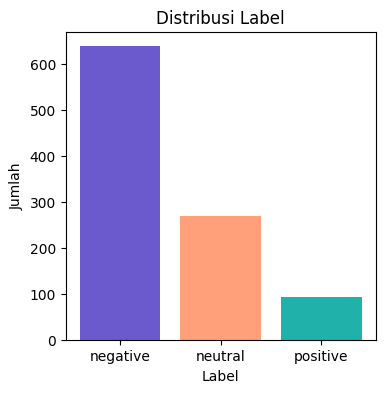

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize=(4,4))
plt.bar(count_data['label'], count_data['count'], color=['#6A5ACD', '#FFA07A', '#20B2AA'])
plt.xlabel("Label")
plt.ylabel("Jumlah")
plt.title("Distribusi Label")
plt.xticks(rotation=0)
plt.show()

Word Cloud Data Raw

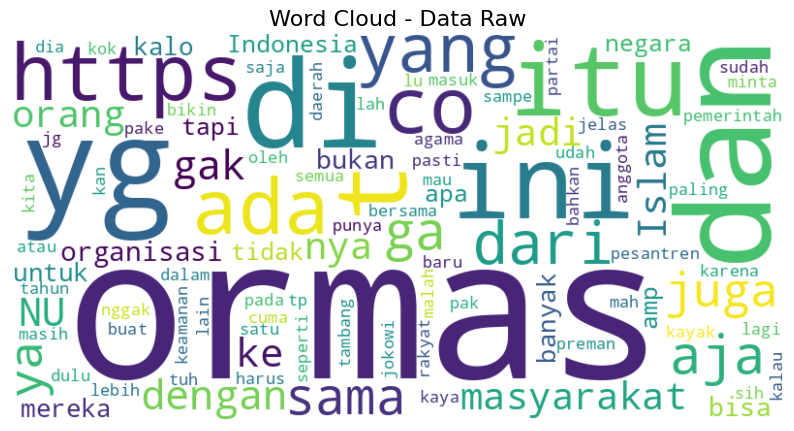

In [ ]:
# word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Visualisasi Word Cloud
text_all = " ".join(data['full_text'])
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=100,
                      collocations=False).generate(text_all)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud - Data Raw", fontsize=16)
plt.show()

# **ORMAS TEKS REPROSESSING**

Cleaning Teks

In [ ]:
import re
def clean_text(text):
    text = str(text).lower() #input berupa string
    text = re.sub(r'http\S+|www\S+|https\S+', '', text) # Hapus URL/link
    text = re.sub(r'@\w+', '', text)  # Hapus mention @username
    text = re.sub(r'#', '', text)  #ormas → ormas
    text = re.sub(r'\d+', '', text) # Hapus angka
    text = re.sub(r'[^a-z\s]', ' ', text) # Hapus tanda baca dan karakter non-huruf
    text = re.sub(r'\brt\b', '', text) # Hapus kata "rt" (retweet)
    text = re.sub(r'\s+', ' ', text).strip()  # Hapus spasi berlebih
    return text
data['clean'] = data['full_text'].apply(clean_text)
print(data[['full_text', 'clean']].head())

                                           full_text  \
0  Nggak itu lebih ke Ormas pemalak instansi pema...   
1  @Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...   
2  Dih apa ini ormas cabang inter kah nitip rokok...   
3  @noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...   
4      Ormas PPI Tunisia PPI lain begini nggak? @ppi   

                                               clean  
0  nggak itu lebih ke ormas pemalak instansi pema...  
1  bener sih emg kntl bgt pemerintah yg bikin mak...  
2  dih apa ini ormas cabang inter kah nitip rokok...  
3  ormas masih sakit hati ga abis abis wkwkwkwkw ...  
4            ormas ppi tunisia ppi lain begini nggak  


Normalisasi Teks

In [ ]:
import nltk
from nltk.tokenize import word_tokenize
# Pastikan tokenizer tersedia
nltk.download('punkt')
nltk.download('punkt_tab')
#Kamus Normalisasi (kata tidak baku → baku)
normalisasi_kamus = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'tdk': 'tidak',
    'dr': 'dari', 'yg': 'yang', 'dgn': 'dengan', 'aja': 'saja',
    'blm': 'belum', 'udh': 'sudah', 'klo': 'kalau', 'kalo': 'kalau',
    'sm': 'sama', 'tp': 'tapi', 'trs': 'terus', 'bgt': 'banget',
    'dg': 'dengan', 'krn': 'karena', 'sy': 'saya', 'gw': 'saya',
    'gue': 'saya', 'loe': 'kamu', 'lu': 'kamu', 'km': 'kamu',
    'nu': 'nahdatul ulama', 'ormas':'organisasi masyarakat',
    'ppi': 'organisasi masyarakat', 'emg': 'memang', 'jg': 'juga',
    'amp': 'sampe', 'pak': 'bapak', 'aja': 'saja', 'lu': 'kamu',
    'jg': 'juga'
}
#Fungsi Normalisasi Kata Tidak Baku
def normalisasi_kata(teks):
    tokens = word_tokenize(str(teks).lower())
    hasil = []
    for k in tokens:
        if k in normalisasi_kamus:
            hasil.append(normalisasi_kamus[k])
        else:
            hasil.append(k)
    return hasil  # hasil dalam bentuk list
data['normal'] = data['clean'].apply(
    lambda x: ' '.join(normalisasi_kata(x)))

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [ ]:
print(data[['clean', 'normal']].head())

                                               clean  \
0  nggak itu lebih ke ormas pemalak instansi pema...   
1  bener sih emg kntl bgt pemerintah yg bikin mak...   
2  dih apa ini ormas cabang inter kah nitip rokok...   
3  ormas masih sakit hati ga abis abis wkwkwkwkw ...   
4            ormas ppi tunisia ppi lain begini nggak   

                                              normal  
0  tidak itu lebih ke organisasi masyarakat pemal...  
1  bener sih memang kntl banget pemerintah yang b...  
2  dih apa ini organisasi masyarakat cabang inter...  
3  organisasi masyarakat masih sakit hati tidak a...  
4  organisasi masyarakat organisasi masyarakat tu...  


In [ ]:
! pip install sastrawi

 Lematisasi Teks

In [ ]:
import re
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
# Fungsi manual sederhana
def lemmatize_rule_based(kata):
    prefixes = ['meng', 'meny', 'men', 'mem', 'me',
                'peng', 'peny', 'pen', 'pem', 'di',
                'ke', 'se', 'ber', 'ter', 'per']
    suffixes = ['kan', 'an', 'lah', 'nya', 'mu', 'ku']
    # Awalan
    if kata.startswith("meny"):
        kata = "s" + kata[4:]
    elif kata.startswith("mem"):
        kata = kata[3:]
    elif kata.startswith("meng"):
        kata = kata[4:]
    else:
        for p in prefixes:
            if kata.startswith(p) and len(kata) > len(p) + 3:
                kata = kata[len(p):]
                break
    # Akhiran
    for s in suffixes:
        if kata.endswith(s) and len(kata) > len(s) + 3:
            kata = kata[:-len(s)]
            break
    return kata
# Gabungan Manual + Sastrawi
def lemmatize_indonesian_combined(teks):
    teks = str(teks).lower()
    tokens = re.findall(r'\b[a-zA-Z]+\b', teks)
    hasil_manual = [lemmatize_rule_based(k) for k in tokens]
    teks_manual = ' '.join(hasil_manual)
    # Lemmatization tambahan dengan Sastrawi
    hasil_sastrawi = stemmer_id.stem(teks_manual)
    return hasil_sastrawi
# Aplikasi ke DataFrame
data['lemma'] = data['normal'].apply(lemmatize_indonesian_combined)

In [ ]:
print(data[['normal', 'lemma']].head())

                                              normal  \
0  tidak itu lebih ke organisasi masyarakat pemal...   
1  bener sih memang kntl banget pemerintah yang b...   
2  dih apa ini organisasi masyarakat cabang inter...   
3  organisasi masyarakat masih sakit hati tidak a...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                               lemma  
0  tidak itu lebih ke organisasi masyarakat alak ...  
1  bener sih ang kntl banget erintah yang bikin m...  
2  dih apa ini organisasi masyarakat cabang inter...  
3  organisasi masyarakat masih sakit hati tidak a...  
4  organisasi masyarakat organisasi masyarakat tu...  


**Steaming Teks**

In [ ]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from nltk.stem import PorterStemmer
# Inisialisasi Stemmer
factory = StemmerFactory()
stemmer_id = factory.create_stemmer()
stemmer_en = PorterStemmer()
#  Deteksi Bahasa
def detect_language(text):
    eng = re.findall(r'\b(the|is|are|and|for|to|of)\b', text.lower())
    indo = re.findall(r'\b(yang|dan|dari|ke|di|itu|dengan)\b', text.lower())
    return 'en' if len(eng) > len(indo) else 'id'
#Fungsi dengan log perubahan
def bilingual_stem_verbose(text):
    lang = detect_language(text)
    tokens = text.split()
    results = []

    if lang == 'en':
        for t in tokens:
            stemmed = stemmer_en.stem(t)
            results.append((t, stemmed))
    else:
        for t in tokens:
            stemmed = stemmer_id.stem(t)
            results.append((t, stemmed))
    # Print log perubahan per kata
    print(f"\n🔤 Input: {text}")
    print(f"🌐 Language detected: {lang.upper()}")
    for original, stemmed in results:
        if original != stemmed:
            print(f"   {original:15} ➜ {stemmed}")
        else:
            print(f"   {original:15} (no change)")
    # Gabungkan hasil akhir
    return ' '.join([s for _, s in results])
# Terapkan fungsi dan tampilkan log
data["stem"] = data["lemma"].apply(bilingual_stem_verbose)

Streaming output truncated to the last 5000 lines.
   gak             (no change)
   jelas           (no change)

🔤 Input: pas kuat nya warning kapolda kapoles yang sowan pada sepuh organisasi masyarakat telah lengser dan makin lemah sungkem sepuh oris pun lakon i janji telah lengser mah rakyat biasa momong cucu dan aktif bidang lingkung hidup
🌐 Language detected: ID
   pas             (no change)
   kuat            (no change)
   nya             (no change)
   warning         (no change)
   kapolda         (no change)
   kapoles         (no change)
   yang            (no change)
   sowan           (no change)
   pada            (no change)
   sepuh           (no change)
   organisasi      (no change)
   masyarakat      (no change)
   telah           (no change)
   lengser         (no change)
   dan             (no change)
   makin           (no change)
   lemah           (no change)
   sungkem         (no change)
   sepuh           (no change)
   oris            (no change)
   pun    

In [ ]:
print(data[['lemma', 'stem']].head())

                                               lemma  \
0  tidak itu lebih ke organisasi masyarakat alak ...   
1  bener sih ang kntl banget erintah yang bikin m...   
2  dih apa ini organisasi masyarakat cabang inter...   
3  organisasi masyarakat masih sakit hati tidak a...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                                stem  
0  tidak itu lebih ke organisasi masyarakat alak ...  
1  bener sih ang kntl banget erintah yang bikin m...  
2  dih apa ini organisasi masyarakat cabang inter...  
3  organisasi masyarakat masih sakit hati tidak a...  
4  organisasi masyarakat organisasi masyarakat tu...  


**Stopword Removal Teks**

In [ ]:
import nltk
from nltk.corpus import stopwords
from Sastrawi.StopWordRemover.StopWordRemoverFactory import StopWordRemoverFactory
#Download resource penting
nltk.download('stopwords')
nltk.download('punkt')
#Inisialisasi stopwords bawaan
factory = StopWordRemoverFactory()
stopwords_id = set(factory.get_stop_words())
stopwords_en = set(stopwords.words('english'))
#Stopword manual (tambahan sosial media)
stopwords_manual = {
    'yg', 'gk', 'ga', 'nggak', 'tdk', 'aja', 'nih', 'dong', 'deh', 'sih', 'dih',
    'ya', 'kok', 'loh', 'wkwk', 'haha', 'hehe', 'anjir', 'anjay', 'wkwkwkwwkwk',
    'bro', 'sis', 'gan', 'bang', 'gua', 'gue', 'lu', 'loe', 'gw', 'km', 'sy',
    'nih', 'nya', 'lah', 'dong', 'banget', 'bgt', 'rt', 'via', 'sm', 'dr',
    'ttp', 'pdhl', 'gitu', 'loh', 'wkwkwk', 'hahaha', 'klo', 'kalo', 'tp',
    'apa', 'kan', 'si', 'jang', 'jadi', 'jd', 'ang', 'deng', 'mah', 'tuh', 'kek',
    'bahk', 'juga', 'ndiri', 'gak', 'napa', 'prem', 'erintah', 'padahal', 'mana',
    'kyknya', 'gibr', 'dah', 'utk', 'tak', 'bnyk', 'g', 't', 'i', 'ang'
}
stopwords_id.update(stopwords_manual)
#Kamus normalisasi slang (biar cocok)
normalisasi_kamus = {
    'gk': 'tidak', 'ga': 'tidak', 'nggak': 'tidak', 'tdk': 'tidak', 'kntl': 'keren',
    'yg': 'yang', 'aja': 'saja', 'bgt': 'banget', 'udh': 'sudah',
    'klo': 'kalau', 'kalo': 'kalau', 'sm': 'sama', 'dr': 'dari',
    'tp': 'tapi', 'sy': 'saya', 'gue': 'saya', 'gua': 'saya', 'loe': 'kamu', 'lu': 'kamu',
    'ponpres': 'pondok pesantren', 'mbg': 'makan bergiji gratis'
}
#Deteksi bahasa sederhana ===
def detect_language(text):
    eng = re.findall(r'\b(the|is|are|of|and|to|for)\b', text.lower())
    indo = re.findall(r'\b(yang|dan|di|ke|dari|untuk|itu|dengan)\b', text.lower())
    return 'en' if len(eng) > len(indo) else 'id'
#Fungsi Stopword Removal + Normalisasi
def bilingual_stopword_removal(text):
    text = str(text).lower()
    tokens = nltk.word_tokenize(text)
    lang = detect_language(text)
    normalized_tokens = []
    for w in tokens:
        # normalisasi slang
        if w in normalisasi_kamus:
            w = normalisasi_kamus[w]
        normalized_tokens.append(w)
    if lang == 'en':
        filtered = [w for w in normalized_tokens if w not in stopwords_en]
    else:
        filtered = [w for w in normalized_tokens if w not in stopwords_id]
    return ' '.join(filtered)
#Terapkan ke DataFrame
data['stop'] = data['stem'].apply(bilingual_stopword_removal)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
print(data[['stem', 'stop']].head())

                                                stem  \
0  tidak itu lebih ke organisasi masyarakat alak ...   
1  bener sih ang kntl banget erintah yang bikin m...   
2  dih apa ini organisasi masyarakat cabang inter...   
3  organisasi masyarakat masih sakit hati tidak a...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                                stop  
0  lebih organisasi masyarakat alak instansi alak...  
1  bener keren bikin makin payah antar organisasi...  
2  organisasi masyarakat cabang inter nitip rokok...  
3  organisasi masyarakat sakit hati abis abis wkw...  
4  organisasi masyarakat organisasi masyarakat tu...  


Word Cloud

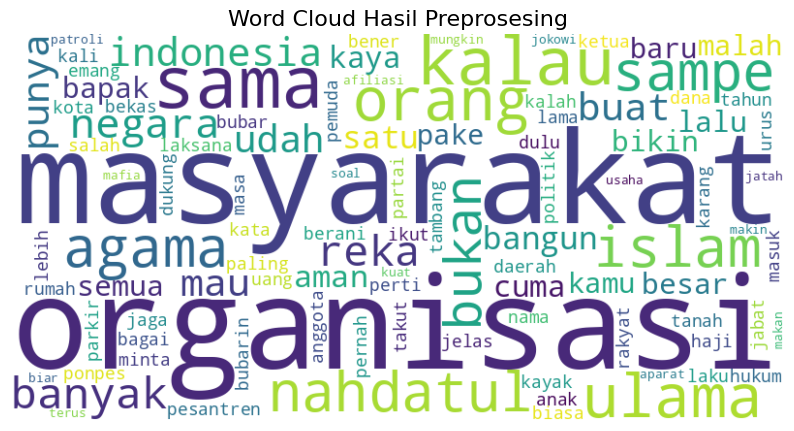

In [ ]:
# word cloud
import matplotlib.pyplot as plt
from wordcloud import WordCloud
# Visualisasi Word Cloud
text_all = " ".join(data['stop'])
wordcloud = WordCloud(width=800, height=400,
                      background_color='white',
                      max_words=100,
                      collocations=False).generate(text_all)
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.title("Word Cloud Hasil Preprosesing", fontsize=16)
plt.show()

**Tokenisasi Teks**

In [ ]:
! pip install tensorflow

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(data['stop'])
data['token'] = tokenizer.texts_to_sequences(data['stop'])
print(data[['stop', 'token']].head())

                                                stop  \
0  lebih organisasi masyarakat alak instansi alak...   
1  bener keren bikin makin payah antar organisasi...   
2  organisasi masyarakat cabang inter nitip rokok...   
3  organisasi masyarakat sakit hati abis abis wkw...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                               token  
0  [40, 3, 2, 633, 798, 633, 1762, 1763, 633, 216...  
1  [53, 799, 27, 93, 1089, 1090, 3, 2, 9, 41, 9, ...  
2          [3, 2, 1094, 1771, 1772, 1095, 802, 1096]  
3  [3, 2, 636, 193, 404, 404, 1773, 1774, 1775, 4...  
4                      [3, 2, 3, 2, 1777, 3, 2, 172]  


In [ ]:
tempArr = []
tokenizer.word_index

{'<OOV>': 1,
 'masyarakat': 2,
 'organisasi': 3,
 'sama': 4,
 'kalau': 5,
 'ulama': 6,
 'orang': 7,
 'islam': 8,
 'agama': 9,
 'nahdatul': 10,
 'sampe': 11,
 'bukan': 12,
 'banyak': 13,
 'reka': 14,
 'negara': 15,
 'indonesia': 16,
 'mau': 17,
 'buat': 18,
 'punya': 19,
 'udah': 20,
 'bangun': 21,
 'satu': 22,
 'aman': 23,
 'cuma': 24,
 'kaya': 25,
 'bapak': 26,
 'bikin': 27,
 'lalu': 28,
 'besar': 29,
 'semua': 30,
 'baru': 31,
 'malah': 32,
 'pake': 33,
 'kamu': 34,
 'pesantren': 35,
 'minta': 36,
 'anggota': 37,
 'ikut': 38,
 'kayak': 39,
 'lebih': 40,
 'kali': 41,
 'masuk': 42,
 'daerah': 43,
 'paling': 44,
 'bagai': 45,
 'jelas': 46,
 'lama': 47,
 'perti': 48,
 'tahun': 49,
 'laku': 50,
 'tanah': 51,
 'ponpes': 52,
 'bener': 53,
 'tambang': 54,
 'hukum': 55,
 'partai': 56,
 'nama': 57,
 'anak': 58,
 'bubar': 59,
 'dulu': 60,
 'rakyat': 61,
 'takut': 62,
 'masa': 63,
 'jabat': 64,
 'pemuda': 65,
 'rumah': 66,
 'berani': 67,
 'karang': 68,
 'dukung': 69,
 'kalah': 70,
 'laksana': 71

In [ ]:
for key in tokenizer.word_index:
  tempArr.append(key)

In [ ]:
numTextTokenized = []
for i in data['token']:
  tempArr_2 = []
  for j in i:
    tempArr_2.append(j)
  numTextTokenized.append(tempArr_2)

In [ ]:
for i in range(len(numTextTokenized)):
  for j in range(len(numTextTokenized[i])):
    numTextTokenized[i][j] = tempArr[numTextTokenized[i][j] - 1]
data['tokening'] = numTextTokenized

In [ ]:
print(data[['stop', 'tokening']].head())

                                                stop  \
0  lebih organisasi masyarakat alak instansi alak...   
1  bener keren bikin makin payah antar organisasi...   
2  organisasi masyarakat cabang inter nitip rokok...   
3  organisasi masyarakat sakit hati abis abis wkw...   
4  organisasi masyarakat organisasi masyarakat tu...   

                                            tokening  
0  [lebih, organisasi, masyarakat, alak, instansi...  
1  [bener, keren, bikin, makin, payah, antar, org...  
2  [organisasi, masyarakat, cabang, inter, nitip,...  
3  [organisasi, masyarakat, sakit, hati, abis, ab...  
4  [organisasi, masyarakat, organisasi, masyaraka...  


In [ ]:
# data.to_csv('Ormas_preprosesing.csv', index=False)

## TF-IDF FRECUENCY

In [ ]:
# Melihat kembali baris yang telah di tokenisasi
for i, tokens in enumerate(data['tokening']):
    print(f"Review {i+1}:")
    print(tokens, "\n")

Review 1:
['lebih', 'organisasi', 'masyarakat', 'alak', 'instansi', 'alak', 'sam', 'regulasi', 'alak', 'tambah', 'legislatif', 'banyak', 'bodoh'] 

Review 2:
['bener', 'keren', 'bikin', 'makin', 'payah', 'antar', 'organisasi', 'masyarakat', 'agama', 'kali', 'agama', 'ring', 'saling', 'sabotase', 'provokasi', 'forum', 'rukun', 'umat', 'agama', 'fkub', 'biar', 'ngasih', 'rekomendasi', 'sbg', 'syarat', 'imb', 'trus', 'diem', 'bae', 'jnck'] 

Review 3:
['organisasi', 'masyarakat', 'cabang', 'inter', 'nitip', 'rokok', 'anying', 'najis'] 

Review 4:
['organisasi', 'masyarakat', 'sakit', 'hati', 'abis', 'abis', 'wkwkwkwkw', 'puasa', 'nyaris', 'tahun', 'emang', 'bikin', 'tantrum'] 

Review 5:
['organisasi', 'masyarakat', 'organisasi', 'masyarakat', 'tunisia', 'organisasi', 'masyarakat', 'begini'] 

Review 6:
['sholawat', 'dj', 'bukan', 'zionis', 'versi', 'lite', 'organisasi', 'masyarakat', 'nambang'] 

Review 7:
['bias', 'pungli', 'organisasi', 'masyarakat', 'goes', 'international'] 

Review 8

In [ ]:
index = 0
for i in data['tokening']:
  if index == 5:
    break
  print(type(i))
  index += 1

<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>
<class 'list'>


**Perhitungan TF**

In [ ]:
def calc_TF(document):
    # Step 1: Count term occurrences
    tf_dict = {}
    for term in document:
        if term in tf_dict:
            tf_dict[term] += 1
        else:
            tf_dict[term] = 1
    # Step 2: Normalize by the total number of terms (TF calculation)
    for term in tf_dict:
        tf_dict[term] = tf_dict[term] / len(document)
    return tf_dict
# Apply TF calculation to each list of tokens in 'tekslist'
data["tf"] = data["tokening"].apply(calc_TF)
# Display the first few TF dictionaries
data["tf"].head()

,tf
0,"{'lebih': 0.07692307692307693, 'organisasi': 0..."
1,"{'bener': 0.03333333333333333, 'keren': 0.0333..."
2,"{'organisasi': 0.125, 'masyarakat': 0.125, 'ca..."
3,"{'organisasi': 0.07692307692307693, 'masyaraka..."
4,"{'organisasi': 0.375, 'masyarakat': 0.375, 'tu..."


In [ ]:
#Displaying a Document’s TF Values
#Prints all terms and their Term Frequency (TF) values for a specific document (here, document index = 1)
index = 0
print("%20s" % "term", "\t", "tf\n")
for key in data["tf"][index]:
    print('%20s' % key, "\t", data["tf"][index][key])

                term 	 tf

               lebih 	 0.07692307692307693
          organisasi 	 0.07692307692307693
          masyarakat 	 0.07692307692307693
                alak 	 0.23076923076923078
            instansi 	 0.07692307692307693
                 sam 	 0.07692307692307693
            regulasi 	 0.07692307692307693
              tambah 	 0.07692307692307693
          legislatif 	 0.07692307692307693
              banyak 	 0.07692307692307693
               bodoh 	 0.07692307692307693


**Perhitungan IDF**

In [ ]:
#Calculating Document Frequency (DF)
def calc_DF(tfDict):
    count_DF = {}
    for document in tfDict:
        for term in document:
            if term in count_DF:
                count_DF[term] += 1
            else:
                count_DF[term] = 1
    return count_DF

DF = calc_DF(data["tf"])
DF

{'lebih': 29,
 'organisasi': 998,
 'masyarakat': 998,
 'alak': 2,
 'instansi': 3,
 'sam': 1,
 'regulasi': 1,
 'tambah': 10,
 'legislatif': 1,
 'banyak': 58,
 'bodoh': 8,
 'bener': 21,
 'keren': 3,
 'bikin': 34,
 'makin': 14,
 'payah': 2,
 'antar': 2,
 'agama': 61,
 'kali': 28,
 'ring': 13,
 'saling': 1,
 'sabotase': 1,
 'provokasi': 3,
 'forum': 4,
 'rukun': 3,
 'umat': 12,
 'fkub': 1,
 'biar': 17,
 'ngasih': 5,
 'rekomendasi': 1,
 'sbg': 4,
 'syarat': 2,
 'imb': 7,
 'trus': 2,
 'diem': 2,
 'bae': 1,
 'jnck': 1,
 'cabang': 2,
 'inter': 1,
 'nitip': 1,
 'rokok': 2,
 'anying': 3,
 'najis': 2,
 'sakit': 4,
 'hati': 8,
 'abis': 5,
 'wkwkwkwkw': 1,
 'puasa': 1,
 'nyaris': 1,
 'tahun': 20,
 'emang': 20,
 'tantrum': 1,
 'tunisia': 1,
 'begini': 12,
 'sholawat': 1,
 'dj': 1,
 'bukan': 64,
 'zionis': 4,
 'versi': 1,
 'lite': 1,
 'nambang': 2,
 'bias': 2,
 'pungli': 13,
 'goes': 1,
 'international': 1,
 'lihat': 8,
 'ormas': 7,
 'bos': 3,
 'kalau': 103,
 'beda': 12,
 'acara': 9,
 'moal': 2,
 'ja

In [ ]:
#Calculating Inverse Document Frequency (IDF)
import numpy as np
n_document = len(data)
def calc_IDF(n_document, DF):
    IDF_dict = {}
    for term in DF:
        IDF_dict[term] = np.log10(n_document / (DF[term] + 1))
    return IDF_dict
IDF = calc_IDF(n_document, DF)

In [ ]:
selected_terms = ['bubar', 'ulama', 'hukum']
idf_selected = {term: IDF.get(term, 0) for term in selected_terms}
print("Nilai IDF untuk kata ['bubar', 'ulama', 'hukum']:")
print(idf_selected)

Nilai IDF untuk kata ['bubar', 'ulama', 'hukum']:
{'bubar': np.float64(1.6395730970028253), 'ulama': np.float64(1.2019603835668364), 'hukum': np.float64(1.6395730970028253)}


Hasil perhitungan TF_IDF

In [ ]:
#Calculating TF-IDF
#Purpose:
#Computes the TF-IDF value for each term in each document by multiplying TF and IDF.
def calc_TF_IDF(TF, IDF):
    TF_IDF_dict = {}
    for key in TF:
        if key in IDF:  # add safety check
            TF_IDF_dict[key] = TF[key] * IDF[key]
    return TF_IDF_dict
# Apply properly
data["tf-idf"] = data["tf"].apply(lambda x: calc_TF_IDF(x, IDF))

In [ ]:
# Tampilkan nilai TF dan TF-IDF untuk dokumen ke-1
index = 0
print(f'{"Term":<20}\t{"TF":<10}\t{"TF-IDF":<20}')
print('-' * 60)
for term, tfidf_val in data["tf-idf"][index].items():
    tf_val = data["tf"][index].get(term, 0)
    print(f'{term:<20}\t{tf_val:<10.4f}\t{tfidf_val:<20.6f}')

Term                	TF        	TF-IDF              
------------------------------------------------------------
lebih               	0.0769    	0.117245            
organisasi          	0.0769    	0.000133            
masyarakat          	0.0769    	0.000133            
alak                	0.2308    	0.582503            
instansi            	0.0769    	0.184557            
sam                 	0.0769    	0.207713            
regulasi            	0.0769    	0.207713            
tambah              	0.0769    	0.150762            
legislatif          	0.0769    	0.207713            
banyak              	0.0769    	0.094650            
bodoh               	0.0769    	0.157466            


Matrik TF-IDF Vectorizer

In [ ]:
# Membuat matriks TF-IDF
# Urutkan kata berdasarkan Document Frequency (descending)
sorted_DF = sorted(DF.items(), key=lambda kv: kv[1], reverse=True)[:30]
unique_terms = [term for term, _ in sorted_DF]
# Fungsi untuk mengonversi TF-IDF dict ke vektor
def calc_TF_IDF_Vec(tfidf_dict):
    vector = [0.0] * len(unique_terms)
    for i, term in enumerate(unique_terms):
        vector[i] = tfidf_dict.get(term, 0.0)
    return vector
# Terapkan fungsi ke setiap dokumen
data["tf_idf_vector"] = data["tf-idf"].apply(calc_TF_IDF_Vec)
# Cek hasil
print("Tampilan baris pertama dari matriks tf_idf_vector:\n")
print(data["tf_idf_vector"].iloc[1])
print("\nUkuran vektor (jumlah fitur):", len(data["tf_idf_vector"].iloc[0]))

Tampilan baris pertama dari matriks tf_idf_vector:

[np.float64(5.78481598145257e-05), np.float64(5.78481598145257e-05), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.12089092435221643), 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, np.float64(0.04857442962233808), 0.0, 0.0, 0.0, 0.0]

Ukuran vektor (jumlah fitur): 30


Menampilkan hasil ke dalam list

In [ ]:
# Menampilkan top 30 term berdasarkan total TF-IDF
# Konversi kolom TF-IDF vector menjadi array 2D
TF_IDF_Vec_List = np.array(data["tf_idf_vector"].to_list())
# Hitung jumlah TF-IDF setiap term di seluruh dokumen
term_sums = TF_IDF_Vec_List.sum(axis=0)
# Buat DataFrame untuk peringkat term
ranking = pd.DataFrame({
    'Term': unique_terms,
    'Rank': term_sums
})
# Urutkan dari nilai tertinggi ke terendah
ranking = ranking.sort_values(by='Rank', ascending=False).reset_index(drop=True)
# Tampilkan top 30 term
print("Top 30 terms berdasarkan total TF-IDF:")
print(ranking.head(100))

Top 30 terms berdasarkan total TF-IDF:
          Term      Rank
0         sama  8.144454
1        kalau  6.583302
2        sampe  6.079152
3        ulama  5.792435
4        islam  5.739226
5        bukan  5.556339
6        agama  5.499089
7       negara  5.345330
8        orang  5.277168
9     nahdatul  4.913241
10      banyak  4.680427
11        udah  4.189197
12        buat  4.060303
13       punya  3.922938
14       bapak  3.865304
15         mau  3.849526
16        reka  3.724875
17        aman  3.599118
18   indonesia  3.464625
19        satu  3.433640
20       semua  3.275960
21       besar  3.190388
22        lalu  3.185326
23        kaya  3.154053
24        baru  3.135983
25        cuma  2.921726
26      bangun  2.833791
27       bikin  2.604207
28  masyarakat  0.193677
29  organisasi  0.193144


In [ ]:
#Analisis kata penting per dokumen
for i, tfidf_vector in enumerate(TF_IDF_Vec_List[:10]):  # contoh 5 dokumen pertama
    top_indices = tfidf_vector.argsort()[-5:][::-1]  # ambil 5 term tertinggi
    top_terms = [unique_terms[idx] for idx in top_indices]
    print(f"Dokumen {i}: {top_terms}")

Dokumen 0: ['banyak', 'masyarakat', 'organisasi', 'semua', 'bapak']
Dokumen 1: ['agama', 'bikin', 'masyarakat', 'organisasi', 'baru']
Dokumen 2: ['masyarakat', 'organisasi', 'semua', 'lalu', 'bapak']
Dokumen 3: ['bikin', 'organisasi', 'masyarakat', 'semua', 'baru']
Dokumen 4: ['masyarakat', 'organisasi', 'semua', 'lalu', 'bapak']
Dokumen 5: ['bukan', 'organisasi', 'masyarakat', 'semua', 'bapak']
Dokumen 6: ['masyarakat', 'organisasi', 'semua', 'lalu', 'bapak']
Dokumen 7: ['bukan', 'kalau', 'masyarakat', 'organisasi', 'bapak']
Dokumen 8: ['masyarakat', 'organisasi', 'semua', 'lalu', 'bapak']
Dokumen 9: ['negara', 'masyarakat', 'organisasi', 'semua', 'bapak']


In [ ]:
# data = pd.read_csv('/content/drive/MyDrive/Semester7 2026/Pemrosesan Teks Praktik/Ormas_preprosesing.csv')
# data.head()
# print(data[['stop', 'token', 'tokening']].head())

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,...,user_id_str,username,label,clean,normal,lemma,stem,stop,token,tokening
0,"1,97644E+18",Thu Oct 09 23:54:56 +0000 2025,0,Nggak itu lebih ke Ormas pemalak instansi pema...,"1,97644E+18",NaN,NaN,in,NaN,0,...,181951692,NaN,negative,nggak itu lebih ke ormas pemalak instansi pema...,tidak itu lebih ke organisasi masyarakat pemal...,tidak itu lebih ke organisasi masyarakat alak ...,tidak itu lebih ke organisasi masyarakat alak ...,lebih organisasi masyarakat alak instansi alak...,"[40, 3, 2, 633, 798, 633, 1762, 1763, 633, 216...","['lebih', 'organisasi', 'masyarakat', 'alak', ..."
1,"1,97628E+18",Thu Oct 09 23:52:21 +0000 2025,0,@Krist888 @ch_chotimah2 @prabowo @Gerindra Ben...,"1,97644E+18",NaN,Krist888,in,NaN,0,...,"1,5663E+18",NaN,negative,bener sih emg kntl bgt pemerintah yg bikin mak...,bener sih memang kntl banget pemerintah yang b...,bener sih ang kntl banget erintah yang bikin m...,bener sih ang kntl banget erintah yang bikin m...,bener keren bikin makin payah antar organisasi...,"[53, 799, 27, 93, 1089, 1090, 3, 2, 9, 41, 9, ...","['bener', 'keren', 'bikin', 'makin', 'payah', ..."
2,"1,97643E+18",Thu Oct 09 23:36:57 +0000 2025,1,Dih apa ini ormas cabang inter kah nitip rokok...,"1,97643E+18",NaN,NaN,in,NaN,0,...,"8,70651E+17",NaN,negative,dih apa ini ormas cabang inter kah nitip rokok...,dih apa ini organisasi masyarakat cabang inter...,dih apa ini organisasi masyarakat cabang inter...,dih apa ini organisasi masyarakat cabang inter...,organisasi masyarakat cabang inter nitip rokok...,"[3, 2, 1094, 1771, 1772, 1095, 802, 1096]","['organisasi', 'masyarakat', 'cabang', 'inter'..."
3,"1,9762E+18",Thu Oct 09 23:27:43 +0000 2025,1,@noelaaee @Norkaf_ @IDWTR @zenrs Ormas masih s...,"1,97643E+18",https://pbs.twimg.com/ext_tw_video_thumb/19764...,noelaaee,in,NaN,0,...,1456928288,NaN,negative,ormas masih sakit hati ga abis abis wkwkwkwkw ...,organisasi masyarakat masih sakit hati tidak a...,organisasi masyarakat masih sakit hati tidak a...,organisasi masyarakat masih sakit hati tidak a...,organisasi masyarakat sakit hati abis abis wkw...,"[3, 2, 636, 193, 404, 404, 1773, 1774, 1775, 4...","['organisasi', 'masyarakat', 'sakit', 'hati', ..."
4,"1,97643E+18",Thu Oct 09 23:22:29 +0000 2025,0,Ormas PPI Tunisia PPI lain begini nggak? @ppi,"1,97643E+18",NaN,NaN,in,NaN,0,...,77976639,NaN,neutral,ormas ppi tunisia ppi lain begini nggak,organisasi masyarakat organisasi masyarakat tu...,organisasi masyarakat organisasi masyarakat tu...,organisasi masyarakat organisasi masyarakat tu...,organisasi masyarakat organisasi masyarakat tu...,"[3, 2, 3, 2, 1777, 3, 2, 172]","['organisasi', 'masyarakat', 'organisasi', 'ma..."


# Klasifikasi Algoritma Model

# Klasifikasi langsung Menggunakan nilai Vector TF-IDF

In [ ]:
from sklearn.model_selection import train_test_split

# TF-IDF matrix
X = np.array(data["tf_idf_vector"].to_list())

# Jika kamu punya label (misal: kategori teks)

y = data["label"]

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report
# Bagi data jadi train-test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Buat dan latih model
nb_model = MultinomialNB()
nb_model.fit(X_train, y_train)
# Prediksi
y_pred = nb_model.predict(X_test)
# Evaluasi hasil
print("Akurasi:", accuracy_score(y_test, y_pred))
print("Laporan klasifikasi:\n", classification_report(y_test, y_pred))

Akurasi: 0.6019900497512438
Laporan klasifikasi:
               precision    recall  f1-score   support

    negative       0.60      1.00      0.75       121
     neutral       0.00      0.00      0.00        59
    positive       0.00      0.00      0.00        21

    accuracy                           0.60       201
   macro avg       0.20      0.33      0.25       201
weighted avg       0.36      0.60      0.45       201



/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.12/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


# Klasifikasi Mengguanakan Naive Bayes 3 Label dan Smote

In [ ]:
X = data["stop"]
y = data["label"]

print("Distribusi Label Awal:")
print(y.value_counts())

Distribusi Label Awal:
label
negative    639
neutral     270
positive     94
Name: count, dtype: int64


In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=2,
    max_features=20000,
    lowercase=True
)

X_tfidf = tfidf.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribusi Label Setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribusi Label Setelah SMOTE:
label
negative    511
neutral     511
positive    511
Name: count, dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.model_selection import GridSearchCV

param_grid = {
    'alpha': [0.1, 0.3, 0.5, 0.7, 1.0]
}

grid = GridSearchCV(
    estimator=MultinomialNB(),
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid.fit(X_train_smote, y_train_smote)

print("\nAlpha terbaik:", grid.best_params_)
print("Akurasi rata-rata CV:", grid.best_score_)

Fitting 5 folds for each of 5 candidates, totalling 25 fits

Alpha terbaik: {'alpha': 0.1}
Akurasi rata-rata CV: 0.8943773817887634


In [ ]:
best_alpha = grid.best_params_['alpha']
best_nb = MultinomialNB(alpha=best_alpha)

best_nb.fit(X_train_smote, y_train_smote)

MultinomialNB(alpha=0.1)

In [ ]:
from sklearn.metrics import accuracy_score, classification_report

y_pred = best_nb.predict(X_test)

print("\nAkurasi Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Test Set: 0.6318407960199005

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.81      0.77       128
     neutral       0.48      0.37      0.42        54
    positive       0.19      0.16      0.17        19

    accuracy                           0.63       201
   macro avg       0.46      0.45      0.45       201
weighted avg       0.61      0.63      0.62       201



# Suport Vector Machine(SVM) 3 Label dan Smote

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),   # unigram + bigram
    max_features=20000,
    min_df=2,
    lowercase=True
)

X_tfidf = tfidf.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    stratify=y,
    random_state=42
)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42, k_neighbors=3)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribusi Label Setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribusi Label Setelah SMOTE:
label
negative    511
neutral     511
positive    511
Name: count, dtype: int64


In [ ]:
param_grid = {
    "C": [0.1, 0.5, 1, 2, 3],
    "loss": ["hinge", "squared_hinge"],
    "class_weight": [None, "balanced"]
}

grid = GridSearchCV(
    LinearSVC(max_iter=5000),
    param_grid,
    cv=5,
    scoring="accuracy",
    n_jobs=-1
)
grid.fit(X_train_smote, y_train_smote)

print("\nParameter Terbaik:", grid.best_params_)
print("Akurasi CV Terbaik:", grid.best_score_)


Parameter Terbaik: {'C': 1, 'class_weight': None, 'loss': 'squared_hinge'}
Akurasi CV Terbaik: 0.9028272764045902


In [ ]:
best_params = grid.best_params_

best_svm = LinearSVC(
    C=best_params["C"],
    loss=best_params["loss"],
    class_weight=best_params["class_weight"],
    max_iter=5000
)

best_svm.fit(X_train_smote, y_train_smote)

LinearSVC(C=1, max_iter=5000)

In [ ]:
y_pred = best_svm.predict(X_test)

print("Akurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))

Akurasi: 0.6368159203980099

Classification Report:
              precision    recall  f1-score   support

    negative       0.73      0.82      0.77       128
     neutral       0.42      0.35      0.38        54
    positive       0.31      0.21      0.25        19

    accuracy                           0.64       201
   macro avg       0.49      0.46      0.47       201
weighted avg       0.61      0.64      0.62       201



Kesimpulan Hasil Teks Prosesing dan Analisis Model



1.   Data Undestanding
    Pada bagian data ini sudah mengalami sedikit pemasalahan dikarenakan data tidak memiliki pola pembahasan yang tertuju dengan hasil data scraping tautu #ormas. Data sangatlah tidak beraturan.
2.   Labeling Data Secara Manual
    Dikarenakan pada saat labeling di gunakan 3 bentuk label yaitu pisitive,negative dan neutral terjadi sedikit permasalahan karena sebagian besar data mengarah ke negative dan sangat susah untuk meberiakan label ke positif dan pada akhirnya di labeling menjadi neutral.
3.   TF-IDF
    Hasil yang di dapatkan setelah melakukan tf-idf terbilang data sangatlah bersih dari 30 kata dengan bobot tertingggi merupakan data yang sudah bersih.
4.   Clasifikasi Model
    Klasifikasi menggunakan 2 model yaitu naive bayes dan svm dengan akurasi hasil yang didapatkan secara berturut turut 68% dan 65%. Hasil ini terbilang sangatlah rendah namun hasil ini juga terbilang bagus karena bayak data yang di labeling sangat susah untuk membedakanya.

# Naive Bayes Menggunakan 2 Label dan Smote

In [ ]:
data_binary = data[data['label'] != 'neutral'].copy()

print("Jumlah data sebelum:", len(data))
print("Jumlah data setelah drop neutral:", len(data_binary))
print("\nDistribusi Label Baru:")
print(data_binary['label'].value_counts())

Jumlah data sebelum: 1003
Jumlah data setelah drop neutral: 733

Distribusi Label Baru:
label
negative    639
positive     94
Name: count, dtype: int64


In [ ]:
X = data_binary['stop']
y = data_binary['label']

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer

tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=2,
    max_features=20000,
    lowercase=True
)

X_tfidf = tfidf.fit_transform(X)

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE
import pandas as pd

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribusi label setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribusi label setelah SMOTE:
label
negative    511
positive    511
Name: count, dtype: int64


In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

nb_model = MultinomialNB()
nb_model.fit(X_train_smote, y_train_smote)

MultinomialNB()

In [ ]:
y_pred = nb_model.predict(X_test)

print("\nAkurasi:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi: 0.782312925170068

Classification Report:
              precision    recall  f1-score   support

    negative       0.91      0.84      0.87       128
    positive       0.28      0.42      0.33        19

    accuracy                           0.78       147
   macro avg       0.59      0.63      0.60       147
weighted avg       0.83      0.78      0.80       147



# SVM Menggunakan 2 Label dan Smote

In [ ]:
# Drop semua data dengan label 'neutral'
data_binary = data[data['label'] != 'neutral'].copy()

print("Jumlah data sebelum:", len(data))
print("Jumlah data setelah drop neutral:", len(data_binary))

# Cek distribusi label baru
print("\nDistribusi Label Baru:")
print(data_binary['label'].value_counts())

Jumlah data sebelum: 1003
Jumlah data setelah drop neutral: 733

Distribusi Label Baru:
label
negative    639
positive     94
Name: count, dtype: int64


In [ ]:
X = data_binary['stop']
y = data_binary['label']

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF
tfidf = TfidfVectorizer(
    ngram_range=(1,2),
    min_df=2,
    max_features=20000
)
X_tfidf = tfidf.fit_transform(X)

# Split
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

In [ ]:
from imblearn.over_sampling import SMOTE

smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("\nDistribusi label setelah SMOTE:")
print(pd.Series(y_train_smote).value_counts())


Distribusi label setelah SMOTE:
label
negative    511
positive    511
Name: count, dtype: int64


In [ ]:
param_grid = {
    'C': [0.1, 0.3, 0.5, 1, 2, 3],
    'loss': ['hinge', 'squared_hinge'],
    'class_weight': [None, 'balanced']
}

svm = LinearSVC()

In [ ]:
grid = GridSearchCV(
    estimator=svm,
    param_grid=param_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)
grid.fit(X_train_smote, y_train_smote)

print("Parameter terbaik:", grid.best_params_)
print("Akurasi rata-rata CV:", grid.best_score_)

Fitting 5 folds for each of 24 candidates, totalling 120 fits
Parameter terbaik: {'C': 1, 'class_weight': None, 'loss': 'squared_hinge'}
Akurasi rata-rata CV: 0.9726159732185558


In [ ]:
best_svm = LinearSVC(
    C=grid.best_params_['C'],
    loss=grid.best_params_['loss'],
    class_weight=grid.best_params_['class_weight']
)

best_svm.fit(X_train_smote, y_train_smote)

LinearSVC(C=1)

In [ ]:
y_pred = best_svm.predict(X_test)

print("\nAkurasi Test Set:", accuracy_score(y_test, y_pred))
print("\nClassification Report:")
print(classification_report(y_test, y_pred))


Akurasi Test Set: 0.8639455782312925

Classification Report:
              precision    recall  f1-score   support

    negative       0.90      0.95      0.92       128
    positive       0.46      0.32      0.38        19

    accuracy                           0.86       147
   macro avg       0.68      0.63      0.65       147
weighted avg       0.85      0.86      0.85       147



# **BERT / IndoBERT**

Bagian	Optimasi
Representasi Teks,	IndoBERT (lebih bagus untuk Bahasa Indonesia dibanding TF-IDF)

Imbalanced Dataset,	class_weight='balanced' untuk mengatasi bias

Tokenizer,	BERT tokenizer (better semantic capture)

Loss Function,	CrossEntropyLoss dengan class_weight

Training, Strategy	AdamW, LR 2e-5, eval per epoch

Metrics,	Weighted F1, Accuracy, Precision, Recall


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.utils.class_weight import compute_class_weight
from sklearn.preprocessing import LabelEncoder
from datasets import Dataset
import torch

from transformers import (
    BertTokenizerFast,
    BertForSequenceClassification,
    TrainingArguments,
    Trainer
)

from sklearn.metrics import accuracy_score, precision_recall_fscore_support

In [ ]:
df = data.dropna(subset=["stop", "label"])

In [ ]:
# Encode label
le = LabelEncoder()
df["label"] = le.fit_transform(df["label"])

In [ ]:
# Train-val split
train_df, val_df = train_test_split(df, test_size=0.2, stratify=df["label"], random_state=42)

train_ds = Dataset.from_pandas(train_df)
val_ds   = Dataset.from_pandas(val_df)

In [ ]:
MODEL_NAME = "indobenchmark/indobert-base-p1"
tokenizer = BertTokenizerFast.from_pretrained(MODEL_NAME)

/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:94: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


tokenizer_config.json:   0%|          | 0.00/2.00 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json: 0.00B [00:00, ?B/s]

In [ ]:
# Tokenizing function
def tokenize(batch):
    return tokenizer(
        batch["stop"],
        padding="max_length",
        truncation=True,
        max_length=128
    )

train_ds = train_ds.map(tokenize, batched=True)
val_ds = val_ds.map(tokenize, batched=True)

Map:   0%|          | 0/802 [00:00<?, ? examples/s]

Map:   0%|          | 0/201 [00:00<?, ? examples/s]

In [ ]:
# Remove unused columns
train_ds = train_ds.remove_columns(["stop", "__index_level_0__"])
val_ds   = val_ds.remove_columns(["stop", "__index_level_0__"])

train_ds.set_format("torch")
val_ds.set_format("torch")

In [ ]:
class_names = np.unique(train_df["label"])
weights = compute_class_weight(
    class_weight="balanced",
    classes=class_names,
    y=train_df["label"]
)

class_weights_tensor = torch.tensor(weights, dtype=torch.float)

In [ ]:
class WeightedBERT(torch.nn.Module):
    def __init__(self):
        super().__init__()
        self.model = BertForSequenceClassification.from_pretrained(
            MODEL_NAME,
            num_labels=len(class_names)
        )
        self.loss_fct = torch.nn.CrossEntropyLoss(weight=class_weights_tensor)

    def forward(self, input_ids=None, attention_mask=None, labels=None):
        outputs = self.model(
            input_ids=input_ids,
            attention_mask=attention_mask,
            labels=None
        )
        logits = outputs.logits

        loss = None
        if labels is not None:
            loss = self.loss_fct(logits, labels)

        return {"loss": loss, "logits": logits}

model = WeightedBERT()

pytorch_model.bin:   0%|          | 0.00/498M [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/498M [00:00<?, ?B/s]

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indobenchmark/indobert-base-p1 and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.


In [ ]:
def compute_metrics(pred):
    labels = pred.label_ids
    preds = np.argmax(pred.predictions, axis=1)

    acc = accuracy_score(labels, preds)
    p, r, f1, _ = precision_recall_fscore_support(labels, preds, average="weighted")

    return {
        "accuracy": acc,
        "precision": p,
        "recall": r,
        "f1": f1
    }

In [ ]:
training_args = TrainingArguments(
    output_dir="./bert-indo-model",
    eval_strategy="epoch",
    save_strategy="epoch",
    learning_rate=2e-5,
    per_device_train_batch_size=16,
    per_device_eval_batch_size=16,
    num_train_epochs=4,
    weight_decay=0.01,
    logging_steps=50,
)

In [ ]:
# @title
trainer = Trainer(
    model=model,
    args=training_args,
    train_dataset=train_ds,
    eval_dataset=val_ds,
    tokenizer=tokenizer,
    compute_metrics=compute_metrics
)

trainer.train()

/tmp/ipython-input-2214961272.py:1: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(
wandb: Logging into wandb.ai. (Learn how to deploy a W&B server locally: https://wandb.me/wandb-server)
wandb: You can find your API key in your browser here: https://wandb.ai/authorize?ref=models
wandb: Paste an API key from your profile and hit enter:

 ··········


wandb: WARNING If you're specifying your api key in code, ensure this code is not shared publicly.
wandb: WARNING Consider setting the WANDB_API_KEY environment variable, or running `wandb login` from the command line.
wandb: No netrc file found, creating one.
wandb: Appending key for api.wandb.ai to your netrc file: /root/.netrc
wandb: Currently logged in as: rinaldihamzah (rinaldihamzah-universitas-teknologi-yogyakarta) to https://api.wandb.ai. Use `wandb login --relogin` to force relogin


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Epoch,Training Loss,Validation Loss,Accuracy,Precision,Recall,F1
1,1.052700,0.943518,0.656716,0.682476,0.656716,0.668382
2,0.792200,0.992557,0.562189,0.680680,0.562189,0.576475
3,0.554800,1.108077,0.681592,0.661527,0.681592,0.669752
4,0.352700,1.214220,0.681592,0.667045,0.681592,0.673223


/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


TrainOutput(global_step=204, training_loss=0.6801434328743056, metrics={'train_runtime': 4809.505, 'train_samples_per_second': 0.667, 'train_steps_per_second': 0.042, 'total_flos': 0.0, 'train_loss': 0.6801434328743056, 'epoch': 4.0})

In [ ]:
eval_result = trainer.evaluate()
print("Evaluation:", eval_result)

/usr/local/lib/python3.12/dist-packages/torch/utils/data/dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)


Evaluation: {'eval_loss': 1.2142199277877808, 'eval_accuracy': 0.681592039800995, 'eval_precision': 0.6670446218519803, 'eval_recall': 0.681592039800995, 'eval_f1': 0.6732233016837291, 'eval_runtime': 77.5134, 'eval_samples_per_second': 2.593, 'eval_steps_per_second': 0.168, 'epoch': 4.0}


In [ ]:
import nbformat

with open("Basic_") as f:
    nb = nbformat.read(f, as_version=4)

# Simpan kembali untuk memperbaiki metadata
nbformat.write(nb, "Basic_Python_Language_For_Data_Science_fixed.ipynb")